In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


In [ ]:
data=pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
data.rename({'Month':'Date'},axis=1,inplace=True)

In [ ]:
data.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
data1=data.copy()
data1.set_index('Date',inplace=True)
data1

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:
data['Date']=pd.to_datetime(data.Date,format='%b-%y')
data['month']=data.Date.dt.strftime('%b')
data['year']=data.Date.dt.strftime('%Y')
data

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


<Axes: xlabel='month', ylabel='year'>

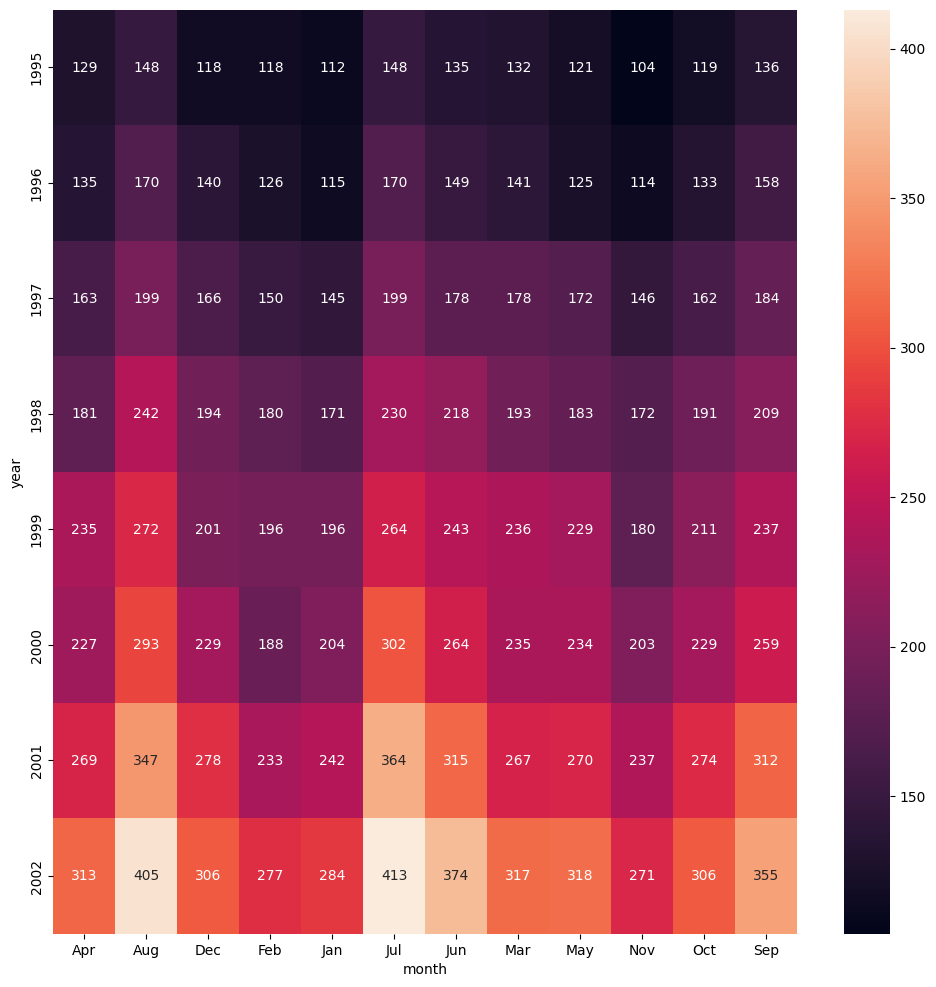

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
heatmap_y=pd.pivot_table(data=data,values='Passengers',index='year',columns='month',aggfunc='mean',fill_value=0)
sns.heatmap(heatmap_y,annot=True,fmt='g')

<Axes: xlabel='year', ylabel='Passengers'>

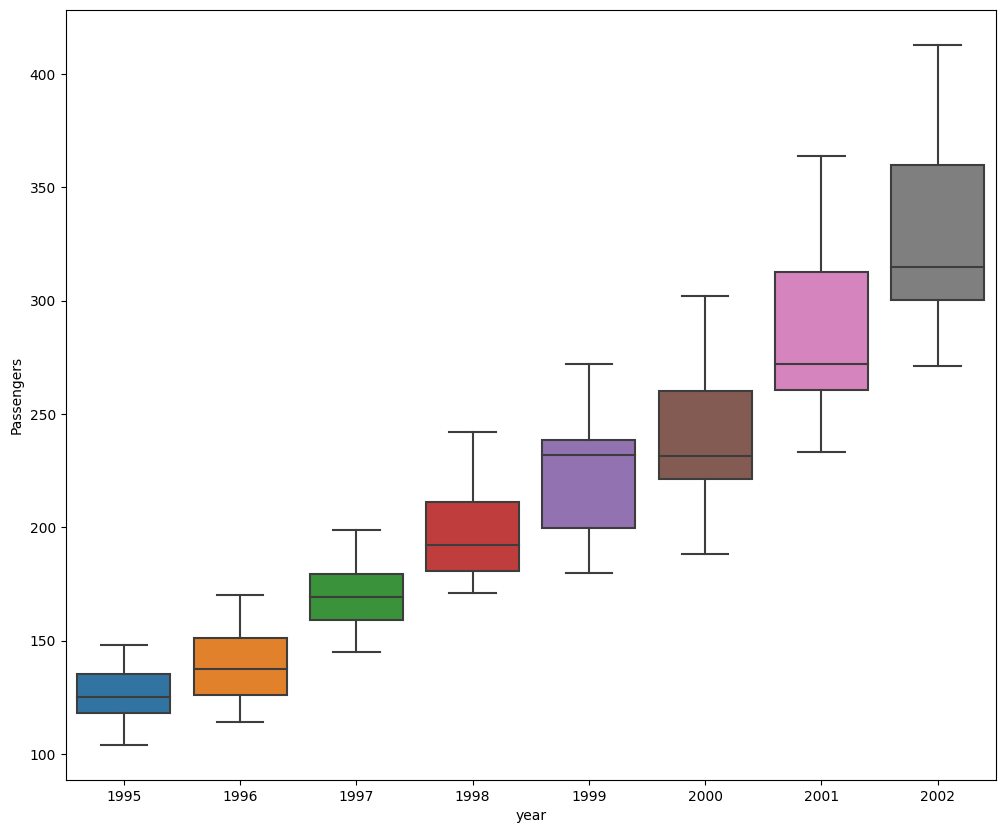

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data,y='Passengers',x='year')

<Axes: xlabel='Date'>

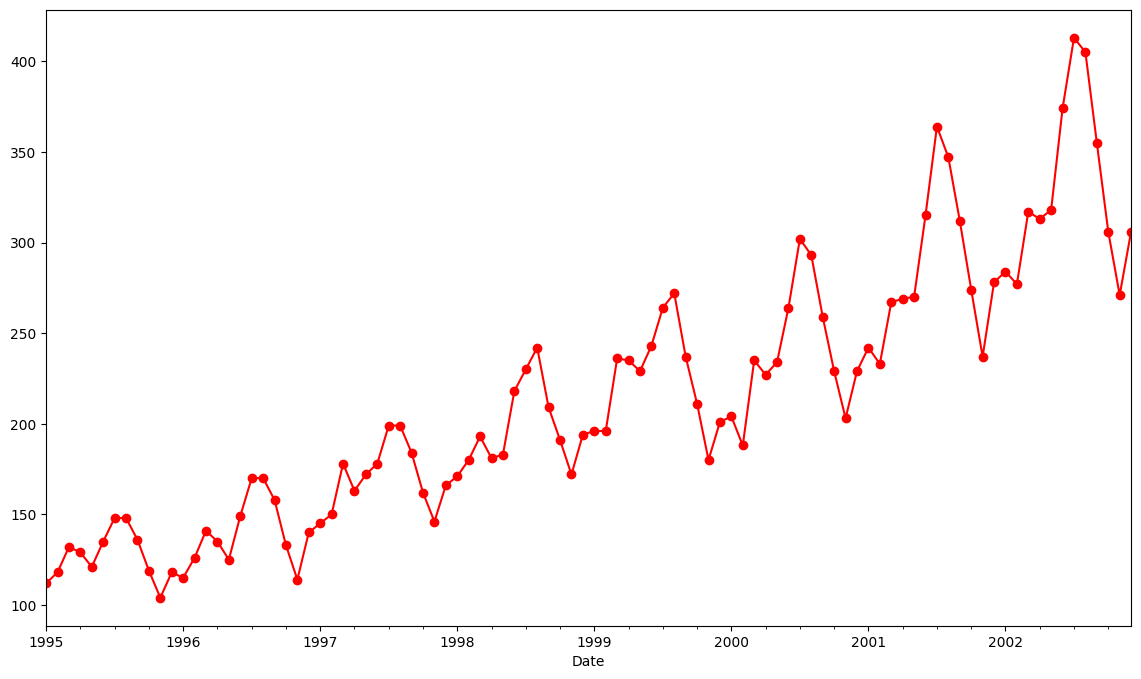

In [ ]:
data1.Passengers.plot(figsize=[14,8],marker='o',color='red')

<Axes: xlabel='year', ylabel='Passengers'>

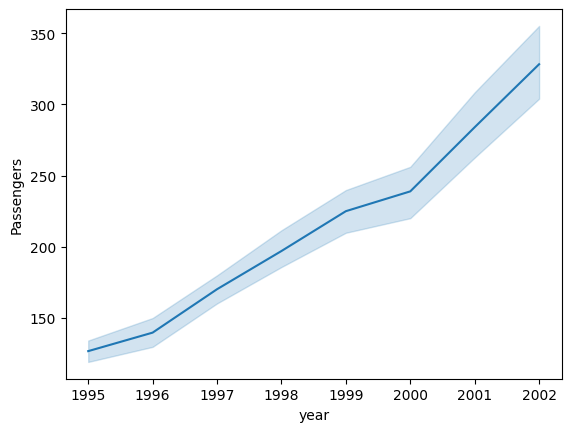

In [ ]:
sns.lineplot(data,x='year',y='Passengers')

In [ ]:
month_dummies=pd.DataFrame(pd.get_dummies(data['month']))
data1=pd.concat([data,month_dummies],axis=1)
data1.head()

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data1['t']=np.arange(1,97)
data1['t_squared']=(data1['t'])**2
data1['log_Passenger']=np.log(data1['Passengers'])
data1.head()

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passenger
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


In [ ]:
Train=data1.head(75)
Test=data1.tail(25)
Test

,Date,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passenger
71,2000-12-01,229,Dec,2000,0,0,1,0,0,0,0,0,0,0,0,0,72,5184,5.433722
72,2001-01-01,242,Jan,2001,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,2001-02-01,233,Feb,2001,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,2001-03-01,267,Mar,2001,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,2001-04-01,269,Apr,2001,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,2001-05-01,270,May,2001,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,2001-06-01,315,Jun,2001,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,2001-07-01,364,Jul,2001,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,2001-08-01,347,Aug,2001,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,2001-09-01,312,Sep,2001,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003


In [ ]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print('rmse_linear :',rmse_linear)

rmse_linear : 51.83809749584509


In [ ]:
exp_model=smf.ols('log_Passenger~t',data=Train).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(Test['log_Passenger'])-np.array(pred_exp))**2))
print('rmse_exp :',rmse_exp)

rmse_exp : 0.13409656145072357


In [ ]:
quad_model=smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_quad=pd.Series(quad_model.predict(pd.DataFrame(Test[['t','t_squared']])))
rmse_quad=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_quad))**2))
('rmse_quad :',rmse_quad)

('rmse_quad :', 54.031406456252654)

In [ ]:
add_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print('rmse_add_sea :', rmse_add_sea)

rmse_add_sea : 123.02763788084235


In [ ]:
add_sea_quad=smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_model=pd.Series(add_sea_quad.predict(Test[['t','t_squared','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_asq=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_model))**2))
print('rmse_asq :' , rmse_asq)

rmse_asq : 36.536274445472245


In [ ]:
mul_sea=smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_mul_sea=pd.Series(mul_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_ms=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mul_sea))**2))
print('rmse_ms :',rmse_ms)

rmse_ms : 123.02763788084235


In [ ]:
data2=pd.DataFrame({'models':['Linear','Exponential','Quadrative Model','Additive Seasonality','Additive Seasonality QT','Mult Seasonality'],'Values':[rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_asq,rmse_ms]})
data2

,models,Values
0,Linear,51.838097
1,Exponential,0.134097
2,Quadrative Model,54.031406
3,Additive Seasonality,123.027638
4,Additive Seasonality QT,36.536274
5,Mult Seasonality,123.027638


In [ ]:
data2.sort_values('Values')

,models,Values
1,Exponential,0.134097
4,Additive Seasonality QT,36.536274
0,Linear,51.838097
2,Quadrative Model,54.031406
3,Additive Seasonality,123.027638
5,Mult Seasonality,123.027638
